# Analysis of European Premier League matches from 2010-2018. 

### This is an analysis of club and individual match data over the course of 7 seasons in the Premier League. I utilize two different datasets in tandem, the first containing data from the 3039 matches over the target time period, and the second contains some broader statistics for individual teams. These datasets will be used to identify interesting trends in match outcomes as well as overall team performance over the course of those 7 seasons. 

### Most interestingly, we are able to identify and put numbers to a sizable dropoff after the first 5-6 of the best-performing teams as well as identify a few key metrics related to the advantage the home team carries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Match Data: 113 columns of data for all 3039 matches from the 2010-11 season to the 2017-18 season.
I read the dataset as a pandas dataframe and cleaned the table a bit by dropping an unnecessary index column and removing any rows of data that fell out of our desired range of seasons. 

In [2]:
main_df = pd.read_csv('df_full_premierleague.csv')
main_df.drop('Unnamed: 0', inplace=True, axis=1) # drop extra index column
# remove seasons outside the range 2010-2018
index_seasons_after_2018 = main_df[ (main_df['season'] == '20/21') |  (main_df['season'] == '19/20') | (main_df['season'] == '18/19')].index
main_df.drop(index_seasons_after_2018, inplace=True)
main_df

,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,16.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,9.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,12.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,11.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,https://www.premierleague.com/match/22591,17/18,2018-01-31,Tottenham Hotspur,Manchester United,2-0,2-0,19.0,6.0,10.0,...,13.9,700.8,1.7,2.04,0.67,33.0,0.88,0.33,13.0,73.6
3035,https://www.premierleague.com/match/22685,17/18,2018-05-09,Chelsea,Huddersfield Town,1-1,0-0,7.0,9.0,7.0,...,19.5,598.9,1.7,0.75,1.56,-29.0,0.42,0.50,-3.0,33.3
3036,https://www.premierleague.com/match/22645,17/18,2018-05-09,Leicester City,Arsenal,3-1,1-0,20.0,6.0,7.0,...,16.5,812.8,1.5,2.00,1.33,24.0,0.81,0.56,9.0,55.6
3037,https://www.premierleague.com/match/22647,17/18,2018-05-09,Manchester City,Brighton and Hove Albion,3-1,2-1,8.0,4.0,5.0,...,15.8,577.3,1.5,0.92,1.31,-14.0,0.42,0.56,-5.0,37.0


### Team Stats: season stats for all teams from 2010-11 season to 2017-18 season. 

### Top 5 teams in average wins/year from the 2010-11 season to the 2017-2018 season.
After doing a little bit of cleaning of the data - removing any data outside our target range - I grouped the data by teams and sorted by average wins/year in descending order. Already, we can see a clear drop off after the first 5 or 6 (Man City, Man Utd, Chelsea, Arsenal, Tottenham, and Liverpool) of the most dominant teams in win total. That's something we will explore a little more. 

In [3]:
match_stats_df = pd.read_csv('stats.csv')
# remove seasons outside the range 2010-2018
index_seasons_before_2010 = match_stats_df[ (match_stats_df['season'] == '2006-2007') | (match_stats_df['season'] == '2007-2008')  | (match_stats_df['season'] == '2008-2009') | (match_stats_df['season'] == '2009-2010')  ].index
match_stats_df.drop(index_seasons_before_2010, inplace=True)
team_groups = match_stats_df.groupby("team")
team_groups[["wins"]].mean().sort_values(by='wins', ascending=False)

,wins
team,
Manchester City,24.625000
Manchester United,22.500000
Chelsea,21.875000
Arsenal,21.125000
Tottenham Hotspur,20.625000
Liverpool,18.750000
Everton,14.750000
Leicester City,14.500000
Southampton,13.166667


### Top 5 teams in average goals/year
This, alongside average wins/year will be the foundation for how we measure teams against each other going forward. This is the baseline for what will separate the best teams from everyone else.

In [5]:
team_groups[["goals"]].mean().sort_values(by='goals', ascending=False).head()

,goals
team,
Manchester City,82.625
Arsenal,71.625
Chelsea,69.875
Liverpool,69.375
Manchester United,68.750


### Average for total scoring attempts, goals, and how many times they hit the post of the goal.

This table provides a great high-level picture of how teams are performing over the course of the 7 seasons we are analyzing data from. The best teams are universally scoring more goals, attempting more shots, and tend to make less crucial errors (own goals in this case). They (the top 6 teams in this chart) also tend to have slightly larger variance in the min and max values for goals/season over the 7 seasons we're looking at. This is likely due to the extremely high ceiling in goal-scoring potential for teams like Manchester City (106 goal season... seriously?), whereas the ceiling for teams like Fulham and Newcastle is much lower, and the overall floor (least goals in a seaons by any team is still 27 goals. 

In [4]:
team_groups[["total_scoring_att", "goals", "own_goals"]].agg(['min', 'max', 'mean']).sort_values(by=('goals', 'mean'), ascending=False)

total_scoring_att                    goals         \
                                       min    max        mean   min    max   
team                                                                         
Manchester City                      546.0  738.0  650.000000  60.0  106.0   
Arsenal                              523.0  654.0  594.000000  65.0   77.0   
Chelsea                              526.0  745.0  626.250000  59.0   85.0   
Liverpool                            582.0  739.0  642.000000  47.0  101.0   
Manchester United                    430.0  646.0  549.500000  49.0   89.0   
Tottenham Hotspur                    527.0  701.0  638.125000  55.0   86.0   
Blackpool                            531.0  531.0  531.000000  55.0   55.0   
Leicester City                       423.0  522.0  458.500000  46.0   68.0   
Everton                              359.0  633.0  516.125000  44.0   62.0   
Southampton                          450.0  550.0  513.000000  37.0   59.0   
Bolton Wanderers                     495.0  570.0  532.500000  46.0   52.0   
AFC Bournemouth                      452.0  465.0  460.333333  45.0   55.0   
West Ham United                      372.0  572.0  486.142857  40.0   65.0   
Blackburn Rovers                     453.0  453.0  453.000000  46.0   48.0   
Fulham                               431.0  547.0  494.750000  40.0   50.0   
Newcastle United                     397.0  579.0  489.142857  39.0   56.0   
Swansea City                         338.0  504.0  440.285714  28.0   54.0   
Wolverhampton Wanderers              459.0  473.0  466.000000  40.0   46.0   
Wigan Athletic                       500.0  519.0  510.000000  40.0   47.0   
Reading                              394.0  394.0  394.000000  43.0   43.0   
West Bromwich Albion                 378.0  597.0  463.875000  31.0   56.0   
Crystal Palace                       414.0  476.0  447.800000  33.0   50.0   
Watford                              422.0  446.0  436.000000  40.0   44.0   
Stoke City                           376.0  500.0  425.500000  34.0   48.0   
Norwich City                         413.0  514.0  453.000000  28.0   52.0   
Sunderland                           387.0  532.0  447.428571  29.0   48.0   
Queens Park Rangers                  500.0  539.0  524.333333  30.0   43.0   
Aston Villa                          380.0  506.0  435.166667  27.0   48.0   
Birmingham City                      401.0  401.0  401.000000  37.0   37.0   
Hull City                            397.0  428.0  417.333333  33.0   38.0   
Burnley                              378.0  430.0  399.666667  28.0   39.0   
Brighton and Hove Albion             384.0  384.0  384.000000  34.0   34.0   
Cardiff City                         418.0  418.0  418.000000  32.0   32.0   
Huddersfield Town                    362.0  362.0  362.000000  28.0   28.0   
Middlesbrough                        351.0  351.0  351.000000  27.0   27.0   

                                    own_goals                 
                               mean       min  max      mean  
team                                                          
Manchester City           82.625000       0.0  3.0  1.625000  
Arsenal                   71.625000       0.0  5.0  1.625000  
Chelsea                   69.875000       1.0  2.0  1.500000  
Liverpool                 69.375000       0.0  6.0  2.000000  
Manchester United         68.750000       1.0  4.0  1.750000  
Tottenham Hotspur         66.125000       1.0  3.0  1.625000  
Blackpool                 55.000000       5.0  5.0  5.000000  
Leicester City            54.500000       0.0  5.0  2.250000  
Everton                   53.750000       1.0  4.0  2.000000  
Southampton               49.000000       0.0  5.0  1.333333  
Bolton Wanderers          49.000000       0.0  1.0  0.500000  
AFC Bournemouth           48.333333       0.0  5.0  2.000000  
West Ham United           47.428571       0.0  2.0  1.285714  
Blackburn Rovers          47.000000       1.0  4.0  

### Isolate data for individual teams of interest. 
I took the best (overall) five teams first, then isolated data for the next five in win average as well as another five teams spread throughout the middle of the pack amongst all premier league teams. The reasons I only pulled this sample of 15 teams and didn't use data from some of the worst teams in the dataset is because of the scarcity of data points for those teams at the bottom of the pack. There isn't as reliable a sample size of matches for those teams because of the Premier League's relegation system (many of them are not in the league more than one or two years in this time frame).


In [5]:
# top five teams in win avg
man_city = match_stats_df[match_stats_df['team'] == 'Manchester City']
man_utd = match_stats_df[match_stats_df['team'] == 'Manchester United']
arsenal = match_stats_df[match_stats_df['team'] == 'Arsenal']
liverpool = match_stats_df[match_stats_df['team'] == 'Liverpool']
tottenham = match_stats_df[match_stats_df['team'] == 'Tottenham Hotspur']

# next five teams in win avg
everton = match_stats_df[match_stats_df['team'] == 'Everton']
leicester_city = match_stats_df[match_stats_df['team'] == 'Leicester City']
newcastle = match_stats_df[match_stats_df['team'] == 'Newcastle United']
crystal_palace = match_stats_df[match_stats_df['team'] == 'Crystal Palace']
west_ham = match_stats_df[match_stats_df['team'] == 'West Ham United']

# low-to-bottom five teams in win avg
blackpool = match_stats_df[match_stats_df['team'] == 'Blackpool']
aston_villa = match_stats_df[match_stats_df['team'] == 'Aston Villa']
fulham = match_stats_df[match_stats_df['team'] == 'Fulham']
watford = match_stats_df[match_stats_df['team'] == 'Watford']
norwich_city = match_stats_df[match_stats_df['team'] == 'Norwich City']

### Manchester City is clearly a dominant team during this stretch however the averages don't tell the entire story.

Plotting the goals scored for each season for each of the 5 best teams paints a different picture than the averages might tell. It suggests the other 4 teams are more competitive with Manchester City in any given year than the large gap (more than 10 goals/year more on average than second highest goal-scoring team) we previously saw. The large gap in averages is clearly due to a few huge outlier years for Manchester City.

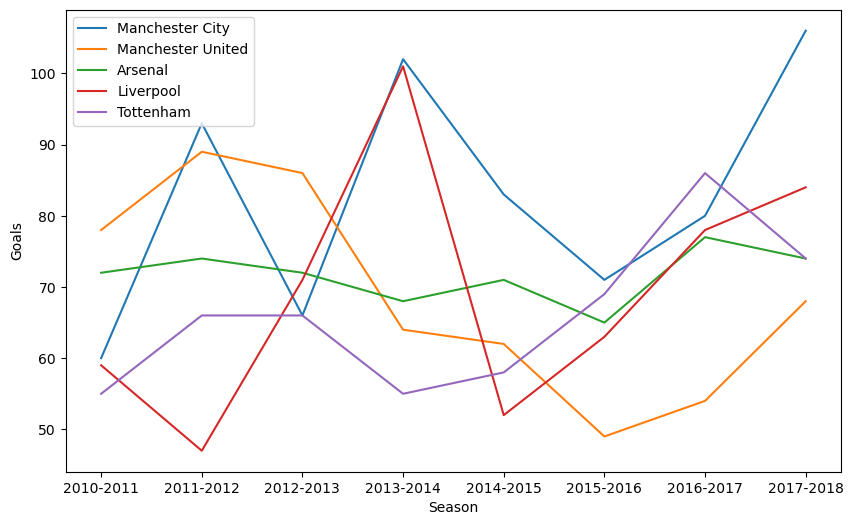

In [6]:
plt.figure(figsize = (10, 6))
plt.plot(man_city['season'],man_city['goals'], label='Manchester City')
plt.plot(man_utd['season'],man_utd['goals'],label='Manchester United')
plt.plot(arsenal['season'],arsenal['goals'], label='Arsenal')
plt.plot(liverpool['season'],liverpool['goals'],label='Liverpool')
plt.plot(tottenham['season'],tottenham['goals'], label='Tottenham')
plt.legend(loc='upper left')
plt.xlabel('Season')
plt.ylabel('Goals');

When you add the next 5 teams in wins, you see a pretty steady dropoff in goals/year, but there isn't a huge gap. Teams like Leicester City are still having competitive seasons (2015-16) where they are outscoring the more elite teams like Arsenal - this is Leicester City's historic championship season, and Arsenal happened to be the runner-up that year. 

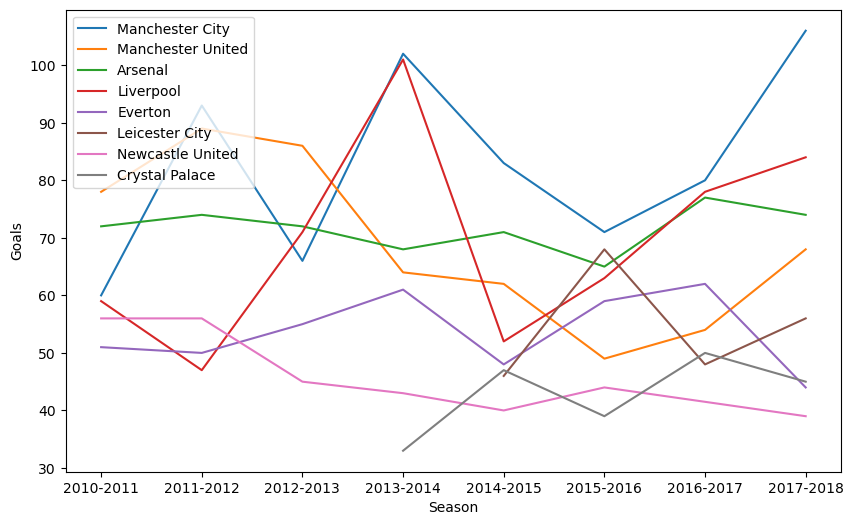

In [7]:
plt.figure(figsize = (10, 6))
plt.plot(man_city['season'],man_city['goals'], label='Manchester City')
plt.plot(man_utd['season'],man_utd['goals'],label='Manchester United')
plt.plot(arsenal['season'],arsenal['goals'], label='Arsenal')
plt.plot(liverpool['season'],liverpool['goals'],label='Liverpool')

#next 5 in wins (excluding chelsea)
plt.plot(everton['season'],everton['goals'], label='Everton')
plt.plot(leicester_city['season'],leicester_city['goals'],label='Leicester City')
plt.plot(newcastle['season'],newcastle['goals'],label='Newcastle United')
plt.plot(crystal_palace['season'],crystal_palace['goals'], label='Crystal Palace')
plt.legend(loc='upper left')
plt.xlabel('Season')
plt.ylabel('Goals');

### However, things get a little clearer when you compare Manchester City directly to those next 5 teams. 
There isn't a single year in which any of the next 5 best teams in wins/year averages outscores Manchester City. That's teams ranked 6-10 in wins/year, which is still the top 50% of the league. there is a clear drop-off and Manchester City is certainly a dominant team over this stretch of seasons - they were league champions 3 of the 7 seasons.

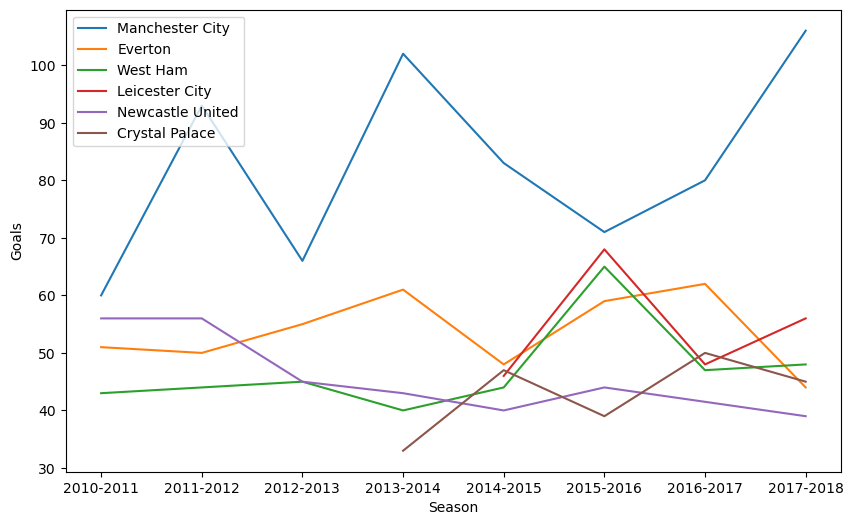

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(man_city['season'],man_city['goals'], label='Manchester City')


#next 5 in wins (excluding chelsea)
plt.plot(everton['season'],everton['goals'], label='Everton')
plt.plot(west_ham['season'],west_ham['goals'], label='West Ham')
plt.plot(leicester_city['season'],leicester_city['goals'],label='Leicester City')

plt.plot(newcastle['season'],newcastle['goals'],label='Newcastle United')
plt.plot(crystal_palace['season'],crystal_palace['goals'], label='Crystal Palace')
plt.legend(loc='upper left')
plt.xlabel('Season')
plt.ylabel('Goals');

### Elite of the elite: 
The 5 best teams are head and shoulders above the rest of the league on average. In this plot, we measure mean goals against mean wins to create a scatter of plot points in which the teams in the upper right corner are the winningest, highest goal-scoring teams, and those at the bottom left are losing the most, scoring the least. The divide between those first 5 and the rest is sizable, with the plot divided very clearly into two distinct sections. 

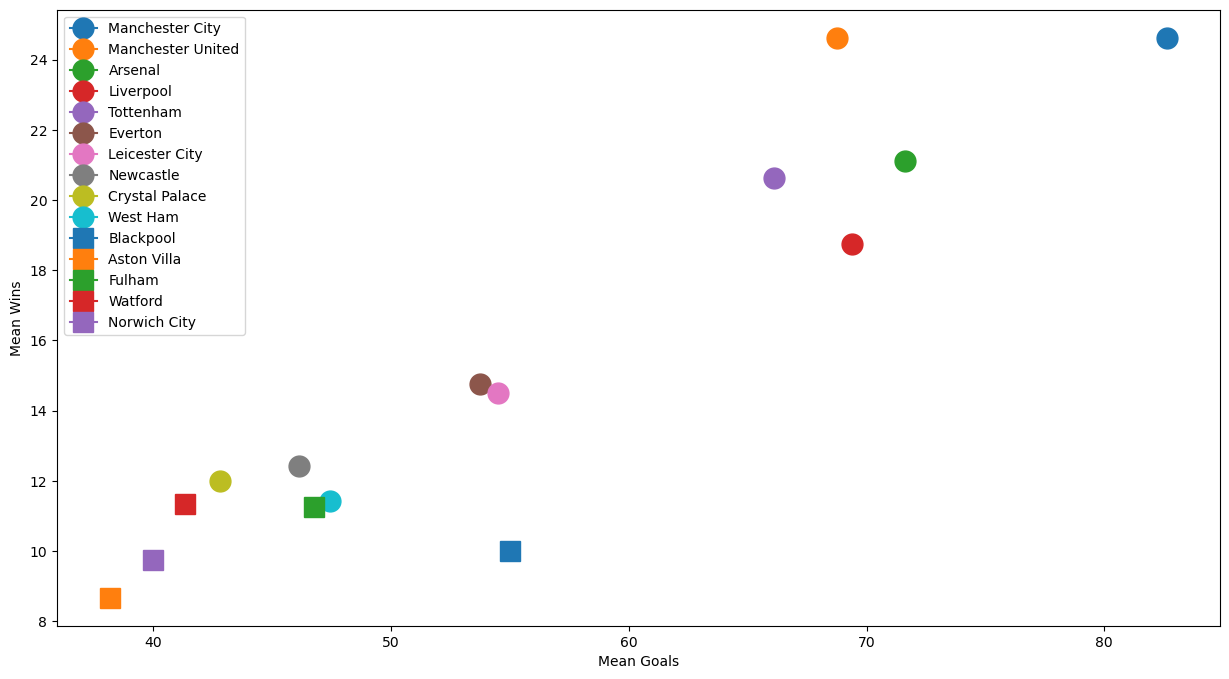

In [9]:
plt.figure(figsize = (15, 8))
plt.plot(man_city["goals"].mean(), man_city["wins"].mean(), marker='o', label="Manchester City", markersize=15)
plt.plot(man_utd["goals"].mean(), man_city["wins"].mean(), marker='o', label="Manchester United", markersize=15)
plt.plot(arsenal["goals"].mean(), arsenal["wins"].mean(), marker='o', label="Arsenal", markersize=15)
plt.plot(liverpool["goals"].mean(), liverpool["wins"].mean(), marker='o', label="Liverpool", markersize=15)
plt.plot(tottenham["goals"].mean(), tottenham["wins"].mean(), marker='o', label="Tottenham", markersize=15)
plt.plot(everton["goals"].mean(), everton["wins"].mean(), marker='o', label="Everton", markersize=15)
plt.plot(leicester_city["goals"].mean(), leicester_city["wins"].mean(), marker='o', label="Leicester City", markersize=15)
plt.plot(newcastle["goals"].mean(), newcastle["wins"].mean(), marker='o', label="Newcastle", markersize=15)
plt.plot(crystal_palace["goals"].mean(), crystal_palace["wins"].mean(), marker='o', label="Crystal Palace", markersize=15)
plt.plot(west_ham["goals"].mean(), west_ham["wins"].mean(), marker='o', label="West Ham", markersize=15)
plt.plot(blackpool["goals"].mean(), blackpool["wins"].mean(), marker='s', label="Blackpool", markersize=15)
plt.plot(aston_villa["goals"].mean(), aston_villa["wins"].mean(), marker='s', label="Aston Villa", markersize=15)
plt.plot(fulham["goals"].mean(), fulham["wins"].mean(), marker='s', label="Fulham", markersize=15)
plt.plot(watford["goals"].mean(), watford["wins"].mean(), marker='s', label="Watford", markersize=15)
plt.plot(norwich_city["goals"].mean(), norwich_city["wins"].mean(), marker='s', label="Norwich City", markersize=15)
plt.legend(loc='upper left')
plt.xlabel('Mean Goals')
plt.ylabel("Mean Wins");


## How much of an advantage is playing in your own stadium?
Playing in your own stadium offers you a clear advantage, that's a well-known fact that is reflected in the oddsmakers predictions for every match. But how distinct is that advantage? I used the dataset of all matches from the range of seasons we are looking at and counted wins, losses, and draws for the home team across all matches. I then created a pie chart and displayed the corresponding percentage values for each outcome, and the results are as expected. The home team is nearly twice as likely to win than either lose or draw, on average.

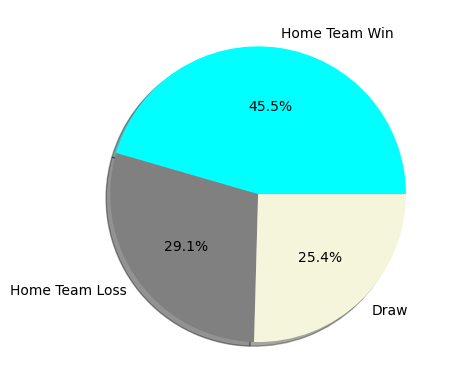

In [10]:
# 3039 total matches 
total = 3039
home_win_lst = []
home_loss_lst = []
draw_lst = []


all_results = main_df['result_full'].to_numpy()
for i in range(len(all_results)):
    if (all_results[i][0] > all_results[i][2] ):
        home_win_lst.append('w')
    elif (all_results[i][0] < all_results[i][2] ):
        home_loss_lst.append('l')
    else:
        draw_lst.append('d')
        
home_win_pct = len(home_win_lst) / total
home_loss_pct = len(home_loss_lst) / total
draw_pct = len(draw_lst) / total
labels = "Home Team Win", "Home Team Loss", "Draw"
slices = [home_win_pct, home_loss_pct, draw_pct]

plt.pie(slices, labels=labels, shadow=True, autopct='%1.1f%%', colors=("cyan", "grey", "beige"));

Another interesting couple of facts: the home team is on average possessing the ball slightly more and being penalized (yellow cards specifically in this instance) slightly less. 

In [11]:
home_possession = main_df['home_possession'].mean()
away_possession = main_df['away_possession'].mean()
home_yellow_avg = main_df['home_yellow_cards'].mean()
away_yellow_avg = main_df['away_yellow_cards'].mean()
print("Mean Home Team Possession: ", home_possession)
print("Mean Away Team Possession: ", away_possession)
print("Mean Home Team Yellow Cards: ", home_yellow_avg)
print("Mean Away Team Yellow Cards: ", away_yellow_avg)

Mean Home Team Possession:  51.27683448502797
Mean Away Team Possession:  48.72316551497203
Mean Home Team Yellow Cards:  1.4817374136229022
Mean Away Team Yellow Cards:  1.7666995722277066


### Clear goal advantage for the home team
I created arrays containing the number of goals scored by the home team and away team in each of the 3039 matches in this time frame and then did the same for columns in our dataframe that contained data related to average number of goals both the home and away teams were scoring in the lead-up to that game. 

The results indicate an increase in goals scored of 15.64% on average for the home team and a decrease in 12.97% goals scored on average for the away team. This is huge! Teams get nearly a 15% boost to goal-scoring output, just for being cheered on by their own fans.

In [13]:
away_goals_entering_game = main_df["goals_scored_ft_avg_away"].to_numpy()
home_goals_entering_game = main_df["goals_scored_ft_avg_home"].to_numpy()
match_score = main_df["result_full"].to_numpy()
home_goals = []
away_goals = []
total_goals = []
for i in range(len(match_score) - 1): 
    home_goals.append(match_score[i][:1])
    away_goals.append(match_score[i][2:])
    total_goals.append(int(match_score[i][:1]) + int(match_score[i][2:]))
    
h_goals_arr = np.asarray(home_goals, dtype="int")
a_goals_arr = np.asarray(away_goals, dtype="int")

a_goals_arr.mean()
home_goals_conceded_entering_game.mean()
away_goals_entering_game = away_goals_entering_game[np.isnan(away_goals_entering_game) == False]
home_goals_entering_game = home_goals_entering_game[np.isnan(home_goals_entering_game) == False]

away_diff_pct = ((away_goals_entering_game.mean() - a_goals_arr.mean()) / away_goals_entering_game.mean()) * 100
home_diff_pct = ((h_goals_arr.mean() - home_goals_entering_game.mean()) / home_goals_entering_game.mean()) * 100
print("Average percentage increase in goals for the home team relative to their season average: " + "{:.2f}".format(home_diff_pct) + "%")
print("Average percentage decrease in goals for the away team relative to their season average: " + "{:.2f}".format(away_diff_pct) + "%" )

Average percentage increase in goals for the home team relative to their season average: 15.64%
Average percentage decrease in goals for the away team relative to their season average: 12.97%
